# Import

In [1]:
# Basic
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter('ignore')

# ML Toolkit
from robusta.crossval import *
from robusta.selector import *
from robusta.pipeline import *
from robusta.preprocessing import *

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import *

# Model
from sklearn.linear_model import LinearRegression, Ridge

# Plot
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import matplotlib

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

Using TensorFlow backend.


# Data

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=200, n_features=50, n_informative=5, 
                       random_state=666, noise=0.5)

X = pd.DataFrame(X)
y = pd.Series(y)

X.rename(columns=lambda x: 'x{}'.format(x), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Task & Model

In [3]:
get_score = lambda y_true, y_pred: -mean_squared_error(y_true, y_pred)
scoring = 'neg_mean_squared_error'

cv = 5

model = LinearRegression()
#model = Ridge()

# Baseline

In [4]:
_, y_pred = crossval_predict(model, cv, X_train, y_train, X_new=X_test,
                             scoring=scoring, verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[23:50:25]  LinearRegression

[23:50:25]  VAL 1:   -0.4142
[23:50:25]  VAL 2:   -0.3914
[23:50:25]  VAL 3:   -0.3894
[23:50:25]  VAL 4:   -0.7514
[23:50:25]  VAL 5:   -0.5598

[23:50:25]  VALID:   -0.5013 ± 0.1401



-0.43316017129971374

# Differential Evolution

In [5]:
selector = GeneticSelector(model, cv, scoring, n_gen=10, pop_size=50, mutation=0.01)
selector.fit(X_train, y_train)

[23:50:25] GENERATION 1
[23:50:25] ITER: 1      SUBSET: 29/50      SCORE: -10377.7060 ± 1981.2713      
[23:50:25] ITER: 2      SUBSET: 19/50      SCORE: -24519.5450 ± 5398.6873      
[23:50:25] ITER: 3      SUBSET: 10/50      SCORE: -15315.6400 ± 3406.1529      
[23:50:25] ITER: 4      SUBSET: 40/50      SCORE: -8679.2116 ± 1597.7145      
[23:50:25] ITER: 5      SUBSET: 25/50      SCORE: -9544.0431 ± 2409.7477      
[23:50:25] ITER: 6      SUBSET: 18/50      SCORE: -14187.5674 ± 2658.1917      
[23:50:25] ITER: 7      SUBSET: 19/50      SCORE: -20740.1791 ± 3888.7812      
[23:50:25] ITER: 8      SUBSET: 14/50      SCORE: -15594.9516 ± 3523.9554      
[23:50:25] ITER: 9      SUBSET: 13/50      SCORE: -13403.4649 ± 4376.5412      
[23:50:26] ITER: 10      SUBSET: 27/50      SCORE: -14496.7715 ± 3738.0760      
[23:50:26] ITER: 11      SUBSET: 17/50      SCORE: -17166.8015 ± 4824.4407      
[23:50:26] ITER: 12      SUBSET: 26/50      SCORE: -16650.3434 ± 2737.6130      
[23:50:26] ITER

[23:50:29] ITER: 101      SUBSET: 41/50      SCORE: -0.4344 ± 0.1356      
[23:50:29] ITER: 102      SUBSET: 41/50      SCORE: -9604.6612 ± 2134.7445      
[23:50:29] ITER: 103      SUBSET: 43/50      SCORE: -10285.5614 ± 3126.6539      
[23:50:29] ITER: 104      SUBSET: 42/50      SCORE: -0.4434 ± 0.0860      
[23:50:29] ITER: 105      SUBSET: 39/50      SCORE: -0.3553 ± 0.1075      
[23:50:29] ITER: 106      SUBSET: 41/50      SCORE: -0.3943 ± 0.0988      
[23:50:29] ITER: 107      SUBSET: 37/50      SCORE: -0.3805 ± 0.0908      
[23:50:29] ITER: 108      SUBSET: 40/50      SCORE: -0.4098 ± 0.1672      
[23:50:29] ITER: 109      SUBSET: 38/50      SCORE: -0.4001 ± 0.0646      
[23:50:29] ITER: 110      SUBSET: 39/50      SCORE: -0.4212 ± 0.0444      
[23:50:29] ITER: 111      SUBSET: 40/50      SCORE: -0.3748 ± 0.1344      
[23:50:29] ITER: 112      SUBSET: 43/50      SCORE: -0.4434 ± 0.0854      
[23:50:30] ITER: 113      SUBSET: 38/50      SCORE: -2947.2868 ± 388.9418      
[23:50:

[23:50:33] ITER: 203      SUBSET: 33/50      SCORE: -0.3666 ± 0.0833      
[23:50:33] ITER: 204      SUBSET: 37/50      SCORE: -0.3800 ± 0.1369      
[23:50:33] ITER: 205      SUBSET: 40/50      SCORE: -0.3686 ± 0.1145      
[23:50:33] ITER: 206      SUBSET: 37/50      SCORE: -8372.0504 ± 1139.0682      
[23:50:33] ITER: 207      SUBSET: 42/50      SCORE: -2885.5812 ± 607.1883      
[23:50:33] ITER: 208      SUBSET: 39/50      SCORE: -8974.0891 ± 1616.6044      
[23:50:33] ITER: 209      SUBSET: 41/50      SCORE: -0.4416 ± 0.1591      
[23:50:33] ITER: 210      SUBSET: 40/50      SCORE: -15865.3141 ± 2633.0971      
[23:50:33] ITER: 211      SUBSET: 37/50      SCORE: -0.3557 ± 0.1095      
[23:50:33] ITER: 212      SUBSET: 37/50      SCORE: -0.3727 ± 0.1347      
[23:50:33] ITER: 213      SUBSET: 39/50      SCORE: -9735.9924 ± 2189.4446      
[23:50:33] ITER: 214      SUBSET: 42/50      SCORE: -0.4128 ± 0.0859      
[23:50:34] ITER: 215      SUBSET: 38/50      SCORE: -0.4409 ± 0.1309  

[23:50:37] ITER: 305      SUBSET: 34/50      SCORE: -0.3893 ± 0.1039      
[23:50:37] ITER: 306      SUBSET: 38/50      SCORE: -0.3632 ± 0.1149      
[23:50:37] ITER: 307      SUBSET: 37/50      SCORE: -13925.2076 ± 2566.2058      
[23:50:37] ITER: 308      SUBSET: 35/50      SCORE: -0.3530 ± 0.0850      
[23:50:37] ITER: 309      SUBSET: 33/50      SCORE: -0.3620 ± 0.1083      
[23:50:37] ITER: 310      SUBSET: 32/50      SCORE: -0.3764 ± 0.0874      
[23:50:37] ITER: 311      SUBSET: 30/50      SCORE: -0.3437 ± 0.0677      
[23:50:37] ITER: 312      SUBSET: 33/50      SCORE: -8733.9204 ± 1567.2236      
[23:50:37] ITER: 313      SUBSET: 37/50      SCORE: -9135.9824 ± 1955.5792      
[23:50:37] ITER: 314      SUBSET: 33/50      SCORE: -16511.5202 ± 3993.4702      
[23:50:37] ITER: 315      SUBSET: 36/50      SCORE: -0.3479 ± 0.0875      
[23:50:37] ITER: 316      SUBSET: 32/50      SCORE: -13853.9297 ± 2496.3475      
[23:50:37] ITER: 317      SUBSET: 30/50      SCORE: -12618.8372 ± 2

[23:50:41] ITER: 408      SUBSET: 31/50      SCORE: -0.3437 ± 0.0828      
[23:50:41] ITER: 409      SUBSET: 31/50      SCORE: -7810.6570 ± 1475.9567      
[23:50:41] ITER: 410      SUBSET: 35/50      SCORE: -5436.4811 ± 1534.0286      
[23:50:41] ITER: 411      SUBSET: 29/50      SCORE: -15414.2156 ± 2368.4535      
[23:50:41] ITER: 412      SUBSET: 33/50      SCORE: -2884.0902 ± 182.6254      
[23:50:41] ITER: 413      SUBSET: 31/50      SCORE: -0.3552 ± 0.0885      
[23:50:41] ITER: 414      SUBSET: 30/50      SCORE: -9077.6992 ± 1588.7273      
[23:50:41] ITER: 415      SUBSET: 32/50      SCORE: -17230.3924 ± 4215.4973      
[23:50:41] ITER: 416      SUBSET: 33/50      SCORE: -7154.1175 ± 1000.3081      
[23:50:41] ITER: 417      SUBSET: 31/50      SCORE: -7087.1550 ± 1857.0233      
[23:50:41] ITER: 418      SUBSET: 33/50      SCORE: -24244.2906 ± 3790.1618      
[23:50:41] ITER: 419      SUBSET: 30/50      SCORE: -7651.4187 ± 1454.9117      
[23:50:41] ITER: 420      SUBSET: 33/5

GeneticSelector(crossover='one', cv=5,
                estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=0.9, max_time=None, min_features=0.1,
                mutation=0.01, n_digits=4, n_gen=10, n_jobs=None, pop_size=50,
                random_state=None, scoring='neg_mean_squared_error', verbose=1)

<IPython.core.display.Javascript object>


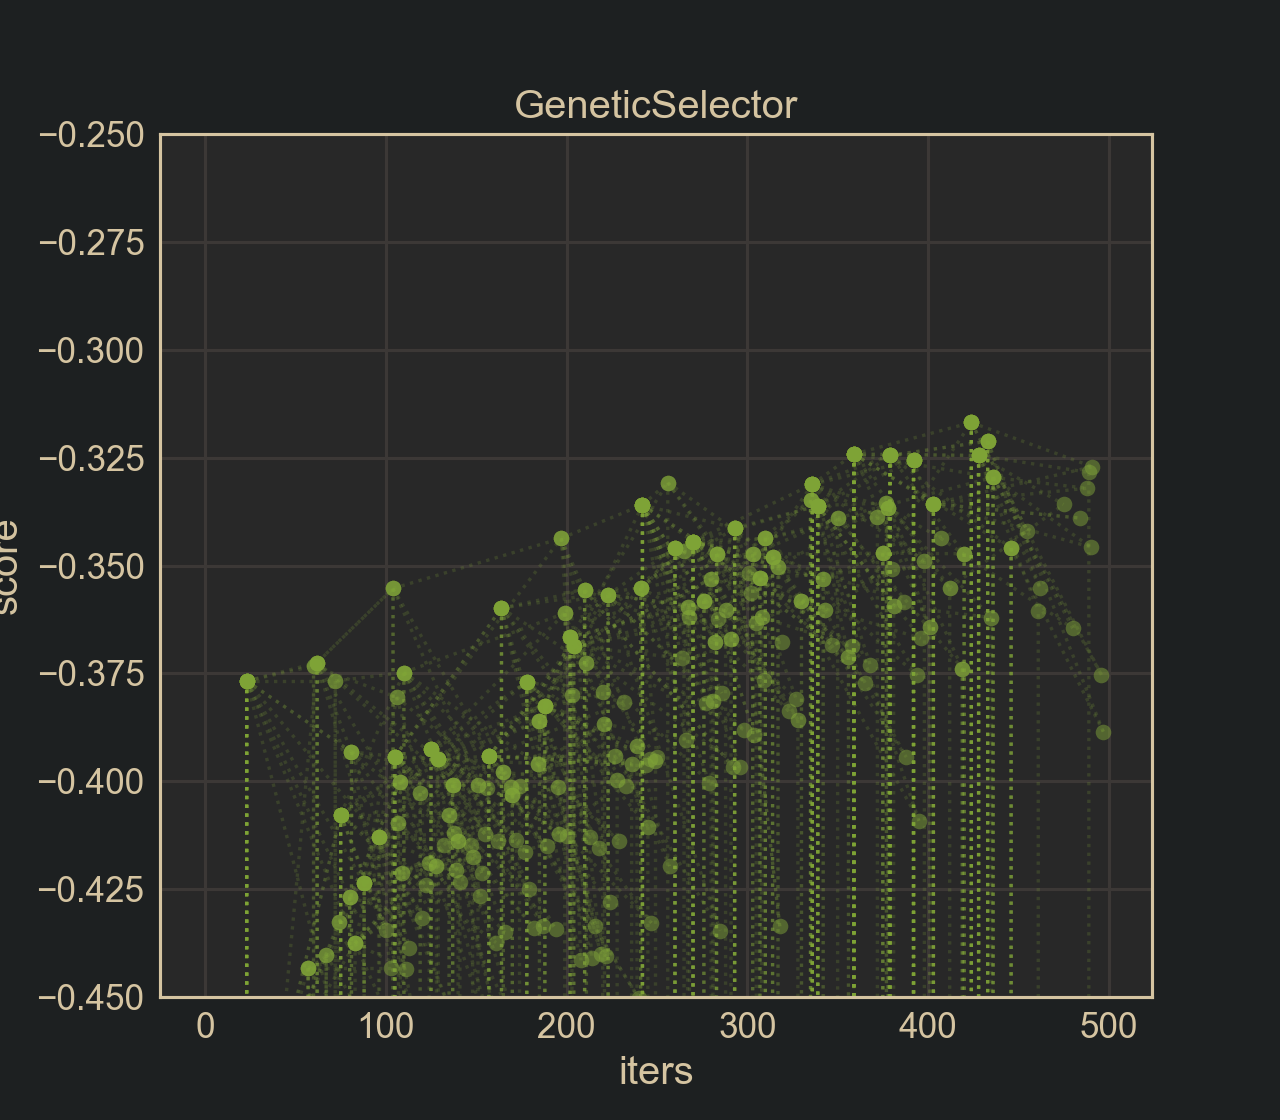

(-0.45, -0.25)

In [6]:
%matplotlib notebook

fig, ax = selector.plot_progress(marker='o', color='g', linestyle=':', alpha=0.2)
ax.set_ylim([-0.45, -0.25])

<IPython.core.display.Javascript object>


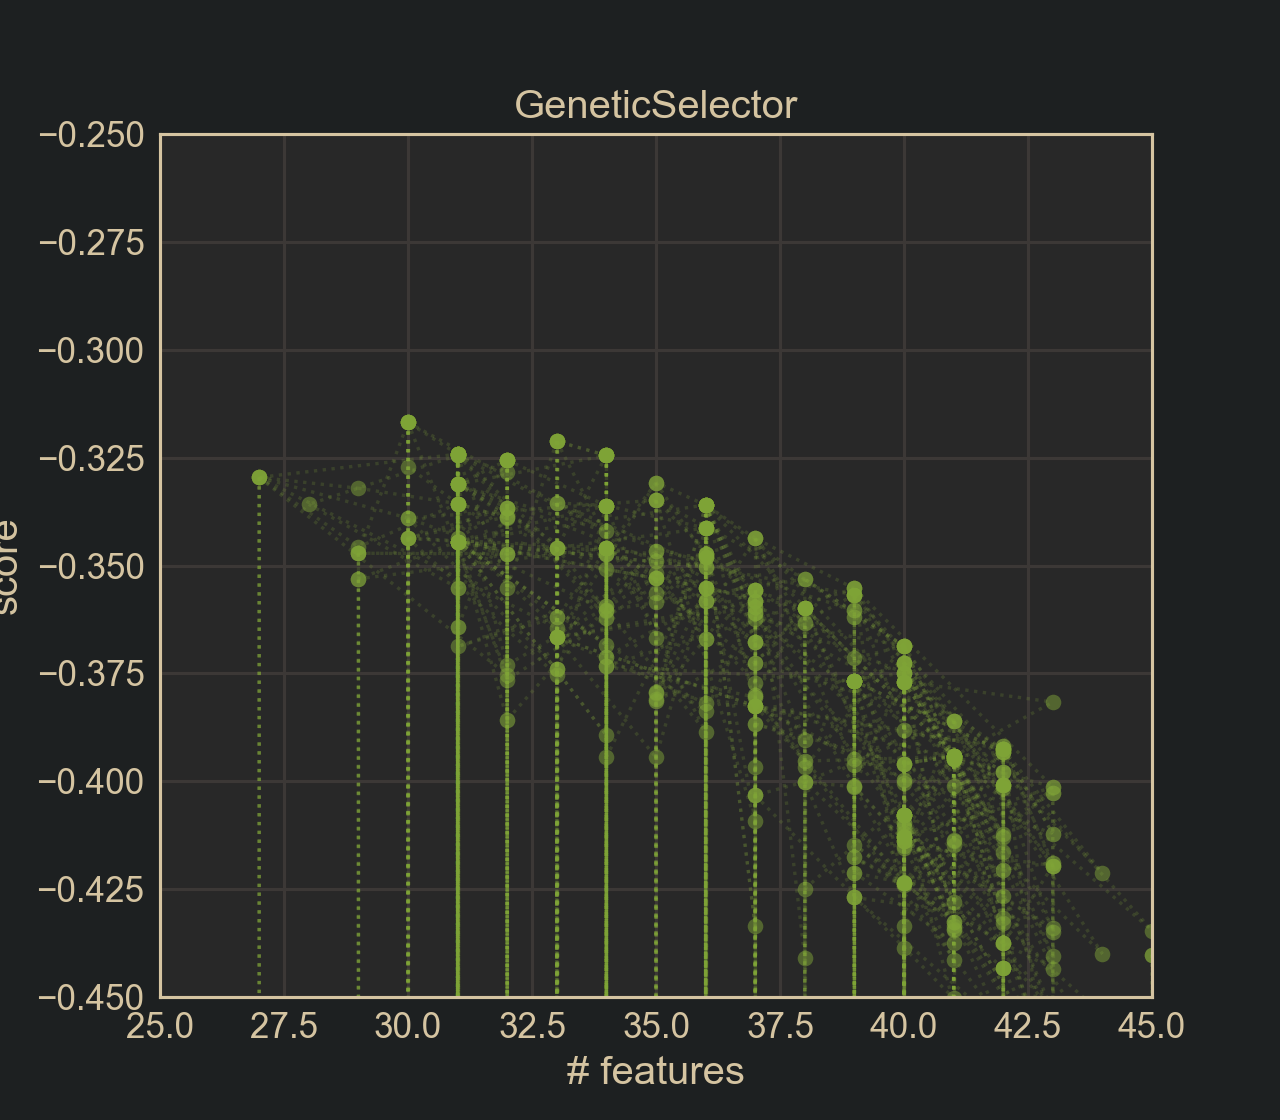

(-0.45, -0.25)

In [8]:
%matplotlib notebook

fig, ax = selector.plot_subset(marker='o', color='g', linestyle=':', alpha=0.2)
ax.set_xlim([25, 45])
ax.set_ylim([-0.45, -0.25])

In [9]:
X_train_ = selector.transform(X_train)
X_test_  = selector.transform(X_test)

_, y_pred = crossval_predict(model, cv, X_train_, y_train, X_new=X_test_,
                             scoring=scoring, verbose=2, n_jobs=-1)

get_score(y_test, y_pred)

[23:51:22]  LinearRegression

[23:51:22]  VAL 1:   -0.3212
[23:51:22]  VAL 2:   -0.3230
[23:51:22]  VAL 3:   -0.2027
[23:51:22]  VAL 4:   -0.4137
[23:51:22]  VAL 5:   -0.3234

[23:51:22]  VALID:   -0.3168 ± 0.0671



-0.379385935876678

In [10]:
selector.get_subset()

FeatureSubset(['x0' 'x3' 'x7' 'x8' 'x9' 'x11' 'x13' 'x16' 'x17' 'x18' 'x19' 'x21' 'x22'
               'x23' 'x24' 'x26' 'x29' 'x30' 'x33' 'x34' 'x36' 'x37' 'x38' 'x39' 'x40'
               'x41' 'x44' 'x46' 'x47' 'x48'])

# Differential Evolution (Group)

In [11]:
K = 3

FUNC = lambda i, k: lambda x: (i*k <= int(x[1:]) < i*k+k)
NAME = lambda i, k: 'x{}-x{}'.format(i*k, i*k+k-1)

prep_pipe = FeatureUnion([
    (NAME(i, K), make_pipeline(ColumnFilter(FUNC(i, K)), ColumnGrouper(NAME(i, K))))
    for i in range(X.shape[1] // K)
])

X_train_ = prep_pipe.fit_transform(X_train)
X_test_ = prep_pipe.transform(X_test)

X_train_

x0-x2                         x3-x5                         x6-x8  \
           x0        x1        x2        x3        x4        x5        x6   
114  1.485966  0.778927 -0.864385  0.359392 -0.032679  0.489878  0.207879   
173  0.486556  0.662671 -0.202896 -1.247124 -0.246749 -0.616115 -0.105831   
5   -0.330599  0.790063  1.548981 -0.849461 -1.105044  2.021317 -0.162607   
126 -0.654698  1.316721 -1.295193 -0.911042  1.553624 -0.391516 -0.984210   
117  0.547798  0.979453  1.566670 -0.626019 -0.577641  0.040761 -0.048920   
..        ...       ...       ...       ...       ...       ...       ...   
106  0.072269  0.337595 -0.469959  1.327680 -1.798906  0.240452 -0.073671   
14   0.158424  0.797651  0.756336  0.003090 -0.756333 -0.269337 -1.304159   
92   0.776376  0.286092  0.742950 -0.053390  1.247804 -2.024651  1.252261   
179  0.706167 -0.521258 -1.523769  0.629821  0.250057 -0.123689  2.073668   
102 -0.430775  0.753842  0.884367 -0.505362 -0.072493 -1.016681  0.135661   

                           x9-x11  ...   x36-x38   x39-x41            \
           x7        x8        x9  ...       x38       x39       x40   
114  0.180076  0.666679 -0.113043  ... -0.669671  0.732318  0.125034   
173 -1.609836 -0.349269  0.752084  ... -0.216235 -0.485783  1.600479   
5   -1.313054 -0.450689  0.698708  ...  1.119375  0.092768  0.896283   
126  1.370630 -0.136763 -0.307159  ...  0.300158  0.313074  0.322048   
117 -0.626446  0.396027  0.704032  ...  0.047883  0.587833 -0.258746   
..        ...       ...       ...  ...       ...       ...       ...   
106  0.194333  1.064415  0.487243  ... -1.086847 -1.675654 -1.685695   
14   0.122283  0.189931 -0.074461  ...  1.942678  0.567575  0.372224   
92   0.932424 -0.288082  1.483835  ... -1.645531  2.099876  0.197551   
179  0.710411  0.561340 -0.932788  ...  1.171574  0.723128 -0.200711   
102  0.619887  0.690728 -1.385902  ...  1.410827  0.233573 -0.388195   

                x42-x44                       x45-x47                      
          x41       x42       x43       x44       x45       x46       x47  
114  0.557775 -1.437116  1.455833  1.294962 -0.297914  0.797666 -1.940304  
173  0.866155 -0.351060  1.867120  2.178016  0.211479 -0.087349  0.839187  
5    2.338996 -0.599598 -0.215401  0.401894 -0.941990 -0.095353 -1.122985  
126 -0.621512  1.961456  0.406908  0.754801 -0.487516  0.427046 -1.915642  
117 -1.051844 -0.173477  1.052304 -0.397517 -1.202259  2.451374  1.006827  
..        ...       ...       ...       ...       ...       ...       ...  
106 -0.197992 -0.003539  0.835951 -0.894685 -0.413028  0.354867 -0.416709  
14  -0.254981  0.087314 -0.461267 -0.020971 -0.631183 -1.158640 -1.866925  
92   0.655423  3.142960  1.589010 -1.395082  0.231625  0.726760 -0.290150  
179 -0.222866  0.187542 -0.573948  0.540289 -0.288105  0.494209  0.038364  
102 -2.091578  1.086238  0.059108  0.946780  1.731445 -0.104947  1.278238  

[150 rows x 48 columns]

In [13]:
selector = GroupGeneticSelector(model, cv, scoring, n_gen=50, pop_size=30, mutation=0.05)
selector.fit(X_train_, y_train)

[23:52:06] GENERATION 1
[23:52:06] ITER: 1      SUBSET: 8/16      SCORE: -20436.8799 ± 3253.0910      
[23:52:06] ITER: 2      SUBSET: 11/16      SCORE: -5739.3821 ± 1557.4706      
[23:52:06] ITER: 3      SUBSET: 7/16      SCORE: -20973.1378 ± 5420.8131      
[23:52:06] ITER: 4      SUBSET: 11/16      SCORE: -23795.2793 ± 5224.2818      
[23:52:06] ITER: 5      SUBSET: 11/16      SCORE: -18446.4001 ± 3141.9519      
[23:52:06] ITER: 6      SUBSET: 3/16      SCORE: -23149.3486 ± 7109.7514      
[23:52:06] ITER: 7      SUBSET: 7/16      SCORE: -12082.9079 ± 1362.8043      
[23:52:06] ITER: 8      SUBSET: 14/16      SCORE: -21423.8592 ± 3047.7735      
[23:52:06] ITER: 9      SUBSET: 14/16      SCORE: -5741.7804 ± 1090.8824      
[23:52:06] ITER: 10      SUBSET: 9/16      SCORE: -21037.9509 ± 4618.5380      
[23:52:06] ITER: 11      SUBSET: 9/16      SCORE: -22173.5825 ± 7050.7580      
[23:52:06] ITER: 12      SUBSET: 7/16      SCORE: -11111.0200 ± 2896.7040      
[23:52:06] ITER: 13   

[23:52:10] ITER: 94      SUBSET: 11/16      SCORE: -22320.3843 ± 6189.8257      
[23:52:10] ITER: 95      SUBSET: 11/16      SCORE: -5053.1235 ± 1488.6579      
[23:52:10] ITER: 96      SUBSET: 9/16      SCORE: -14267.1310 ± 2130.4949      
[23:52:10] ITER: 97      SUBSET: 10/16      SCORE: -19925.3727 ± 5679.0137      
[23:52:10] ITER: 98      SUBSET: 10/16      SCORE: -5172.9260 ± 1820.4745      
[23:52:10] ITER: 99      SUBSET: 10/16      SCORE: -13567.6385 ± 2180.0589      
[23:52:10] ITER: 100      SUBSET: 9/16      SCORE: -14878.9162 ± 4837.4195      
[23:52:10] ITER: 101      SUBSET: 10/16      SCORE: -15422.3953 ± 3402.9042      
[23:52:10] ITER: 102      SUBSET: 11/16      SCORE: -12276.9696 ± 2110.6984      
[23:52:10] ITER: 103      SUBSET: 11/16      SCORE: -5361.5448 ± 1297.5507      
[23:52:10] ITER: 104      SUBSET: 8/16      SCORE: -11907.3635 ± 1364.5442      
[23:52:10] ITER: 105      SUBSET: 11/16      SCORE: -5768.9932 ± 1492.2030      
[23:52:10] ITER: 106      SUB

[23:52:13] ITER: 187      SUBSET: 7/16      SCORE: -12335.0407 ± 4396.9956      
[23:52:13] ITER: 188      SUBSET: 12/16      SCORE: -5177.6985 ± 894.6173      
[23:52:13] ITER: 189      SUBSET: 10/16      SCORE: -12910.7879 ± 2889.0481      
[23:52:14] ITER: 190      SUBSET: 8/16      SCORE: -12251.6593 ± 1365.4989      
[23:52:14] ITER: 191      SUBSET: 9/16      SCORE: -13053.9844 ± 2325.0296      
[23:52:14] ITER: 192      SUBSET: 8/16      SCORE: -11384.9240 ± 2471.9164      
[23:52:14] ITER: 193      SUBSET: 10/16      SCORE: -4675.8012 ± 934.1219      
[23:52:14] ITER: 194      SUBSET: 12/16      SCORE: -5527.7435 ± 1847.3999      
[23:52:14] ITER: 195      SUBSET: 11/16      SCORE: -11865.1829 ± 3630.8331      
[23:52:14] ITER: 196      SUBSET: 10/16      SCORE: -12170.8859 ± 863.0855      
[23:52:14] ITER: 197      SUBSET: 10/16      SCORE: -11889.5030 ± 2448.2695      
[23:52:14] ITER: 198      SUBSET: 8/16      SCORE: -11420.3333 ± 3000.5145      
[23:52:14] ITER: 199      S

[23:52:17] ITER: 280      SUBSET: 7/16      SCORE: -12738.0314 ± 4763.4669      
[23:52:17] ITER: 281      SUBSET: 8/16      SCORE: -10049.7880 ± 2357.9394      
[23:52:17] ITER: 282      SUBSET: 8/16      SCORE: -4551.3401 ± 1066.7160      
[23:52:17] ITER: 283      SUBSET: 10/16      SCORE: -5262.7846 ± 1484.1298      
[23:52:17] ITER: 284      SUBSET: 7/16      SCORE: -19978.7166 ± 4652.7175      
[23:52:17] ITER: 285      SUBSET: 10/16      SCORE: -13905.0217 ± 1728.5530      
[23:52:17] ITER: 286      SUBSET: 9/16      SCORE: -4549.9601 ± 1026.1743      
[23:52:17] ITER: 287      SUBSET: 10/16      SCORE: -12151.1291 ± 2851.9582      
[23:52:17] ITER: 288      SUBSET: 11/16      SCORE: -21369.2862 ± 4797.1330      
[23:52:17] ITER: 289      SUBSET: 12/16      SCORE: -5661.1923 ± 2197.1294      
[23:52:18] ITER: 290      SUBSET: 9/16      SCORE: -4872.1552 ± 1046.1896      
[23:52:18] ITER: 291      SUBSET: 12/16      SCORE: -5435.2638 ± 1881.3722      
[23:52:18] ITER: 292      SU

[23:52:21] ITER: 373      SUBSET: 5/16      SCORE: -4194.2162 ± 944.7706      
[23:52:21] ITER: 374      SUBSET: 8/16      SCORE: -16217.3878 ± 2574.0766      
[23:52:21] ITER: 375      SUBSET: 6/16      SCORE: -25249.7219 ± 6301.7917      
[23:52:21] ITER: 376      SUBSET: 6/16      SCORE: -11530.2600 ± 2411.0341      
[23:52:21] ITER: 377      SUBSET: 5/16      SCORE: -21179.5308 ± 6064.0520      
[23:52:21] ITER: 378      SUBSET: 6/16      SCORE: -5860.8438 ± 1115.4803      
[23:52:21] ITER: 379      SUBSET: 6/16      SCORE: -12824.7548 ± 1856.0885      
[23:52:21] ITER: 380      SUBSET: 5/16      SCORE: -22809.6298 ± 5097.1879      
[23:52:21] ITER: 381      SUBSET: 5/16      SCORE: -4073.3455 ± 975.6980      
[23:52:21] ITER: 382      SUBSET: 4/16      SCORE: -5311.9078 ± 955.3237      
[23:52:21] ITER: 383      SUBSET: 6/16      SCORE: -4369.5928 ± 877.6158      
[23:52:21] ITER: 384      SUBSET: 7/16      SCORE: -10400.8244 ± 1857.4362      
[23:52:21] ITER: 385      SUBSET: 8/1

[23:52:25] ITER: 467      SUBSET: 7/16      SCORE: -17532.2294 ± 2890.6624      
[23:52:25] ITER: 468      SUBSET: 6/16      SCORE: -5546.7524 ± 1085.5687      
[23:52:25] ITER: 469      SUBSET: 8/16      SCORE: -15596.4484 ± 3731.7627      
[23:52:25] ITER: 470      SUBSET: 4/16      SCORE: -10981.3844 ± 2400.2707      
[23:52:25] ITER: 471      SUBSET: 6/16      SCORE: -10290.7920 ± 2974.0772      
[23:52:25] ITER: 472      SUBSET: 5/16      SCORE: -10559.5949 ± 2641.5065      
[23:52:25] ITER: 473      SUBSET: 4/16      SCORE: -10112.7402 ± 1082.9421      
[23:52:25] ITER: 474      SUBSET: 6/16      SCORE: -21079.6666 ± 6771.3152      
[23:52:25] ITER: 475      SUBSET: 6/16      SCORE: -12946.8187 ± 3214.5528      
[23:52:25] ITER: 476      SUBSET: 5/16      SCORE: -15260.9344 ± 3196.9700      
[23:52:25] ITER: 477      SUBSET: 7/16      SCORE: -10861.0208 ± 1910.2320      
[23:52:25] ITER: 478      SUBSET: 5/16      SCORE: -17513.1764 ± 4775.4264      
[23:52:25] ITER: 479      SUB

[23:52:28] ITER: 566      SUBSET: 8/16      SCORE: -16041.5741 ± 3344.0870      
[23:52:28] ITER: 567      SUBSET: 8/16      SCORE: -11494.8938 ± 3181.2593      
[23:52:29] ITER: 568      SUBSET: 7/16      SCORE: -11090.1709 ± 3252.2566      
[23:52:29] ITER: 569      SUBSET: 10/16      SCORE: -12161.0482 ± 2614.9288      
[23:52:29] ITER: 570      SUBSET: 8/16      SCORE: -4573.1922 ± 966.5017      

[23:52:29] SCORE AVG: -12772.7591 ± 6907.4200
[23:52:29] SCORE MIN: -26367.1815
[23:52:29] SCORE MAX: -4160.8174

[23:52:29] SIZE AVG: 7 ± 1.2477
[23:52:29] SIZE MIN: 5
[23:52:29] SIZE MAX: 10

[23:52:29] GENERATION 20
[23:52:29] ITER: 571      SUBSET: 7/16      SCORE: -5713.1947 ± 1145.4385      
[23:52:29] ITER: 572      SUBSET: 10/16      SCORE: -5333.7862 ± 1782.7088      
[23:52:29] ITER: 573      SUBSET: 8/16      SCORE: -4770.6542 ± 1121.0170      
[23:52:29] ITER: 574      SUBSET: 8/16      SCORE: -4700.9049 ± 1030.4680      
[23:52:29] ITER: 575      SUBSET: 8/16      SCORE: -180

[23:52:32] SCORE MIN: -26930.4140
[23:52:32] SCORE MAX: -4518.9969

[23:52:32] SIZE AVG: 7 ± 1.8345
[23:52:32] SIZE MIN: 4
[23:52:32] SIZE MAX: 11

[23:52:32] GENERATION 23
[23:52:32] ITER: 661      SUBSET: 11/16      SCORE: -5084.4106 ± 1156.7658      
[23:52:32] ITER: 662      SUBSET: 7/16      SCORE: -4550.1092 ± 1156.3442      
[23:52:32] ITER: 663      SUBSET: 10/16      SCORE: -13122.5985 ± 1709.1254      
[23:52:32] ITER: 664      SUBSET: 10/16      SCORE: -5412.2919 ± 1727.2797      
[23:52:32] ITER: 665      SUBSET: 9/16      SCORE: -5706.3218 ± 1170.6514      
[23:52:32] ITER: 666      SUBSET: 9/16      SCORE: -15687.0072 ± 3107.1427      
[23:52:33] ITER: 667      SUBSET: 11/16      SCORE: -16501.9581 ± 3055.9879      
[23:52:33] ITER: 668      SUBSET: 9/16      SCORE: -6052.3069 ± 1356.5933      
[23:52:33] ITER: 669      SUBSET: 12/16      SCORE: -5162.9681 ± 1692.6976      
[23:52:33] ITER: 670      SUBSET: 8/16      SCORE: -5555.9034 ± 1068.8230      
[23:52:33] ITER: 67

[23:52:36] ITER: 757      SUBSET: 8/16      SCORE: -19518.9759 ± 5053.2376      
[23:52:36] ITER: 758      SUBSET: 11/16      SCORE: -20209.0626 ± 3965.5717      
[23:52:36] ITER: 759      SUBSET: 10/16      SCORE: -6271.4615 ± 963.2128      
[23:52:36] ITER: 760      SUBSET: 12/16      SCORE: -5360.6114 ± 1651.0893      
[23:52:36] ITER: 761      SUBSET: 10/16      SCORE: -5392.8009 ± 1055.7033      
[23:52:36] ITER: 762      SUBSET: 10/16      SCORE: -4761.3257 ± 1027.0547      
[23:52:36] ITER: 763      SUBSET: 12/16      SCORE: -5082.8271 ± 1056.0699      
[23:52:36] ITER: 764      SUBSET: 12/16      SCORE: -19266.8204 ± 3315.8339      
[23:52:36] ITER: 765      SUBSET: 12/16      SCORE: -5564.3099 ± 1585.3988      
[23:52:36] ITER: 766      SUBSET: 11/16      SCORE: -6696.2262 ± 1628.4661      
[23:52:37] ITER: 767      SUBSET: 13/16      SCORE: -5254.3701 ± 1010.8547      
[23:52:37] ITER: 768      SUBSET: 11/16      SCORE: -15251.7326 ± 1654.0808      
[23:52:37] ITER: 769      

[23:52:40] ITER: 851      SUBSET: 10/16      SCORE: -27419.9114 ± 3206.9081      
[23:52:40] ITER: 852      SUBSET: 11/16      SCORE: -12864.7244 ± 1266.5209      
[23:52:40] ITER: 853      SUBSET: 13/16      SCORE: -6292.2713 ± 2078.1280      
[23:52:40] ITER: 854      SUBSET: 11/16      SCORE: -5433.9418 ± 1627.2912      
[23:52:40] ITER: 855      SUBSET: 11/16      SCORE: -5419.9399 ± 1393.4783      
[23:52:40] ITER: 856      SUBSET: 9/16      SCORE: -14478.2848 ± 1854.4730      
[23:52:40] ITER: 857      SUBSET: 9/16      SCORE: -19017.2201 ± 3916.9654      
[23:52:40] ITER: 858      SUBSET: 11/16      SCORE: -7162.9342 ± 1463.8561      
[23:52:40] ITER: 859      SUBSET: 7/16      SCORE: -10710.0451 ± 2470.0825      
[23:52:40] ITER: 860      SUBSET: 13/16      SCORE: -13661.1644 ± 3148.5074      
[23:52:40] ITER: 861      SUBSET: 11/16      SCORE: -13444.1485 ± 2633.6117      
[23:52:40] ITER: 862      SUBSET: 9/16      SCORE: -11124.3641 ± 1503.9829      
[23:52:40] ITER: 863    

[23:52:44] ITER: 950      SUBSET: 9/16      SCORE: -20457.2868 ± 4362.2538      
[23:52:44] ITER: 951      SUBSET: 10/16      SCORE: -5137.0118 ± 1792.6820      
[23:52:44] ITER: 952      SUBSET: 10/16      SCORE: -16293.9185 ± 3340.0702      
[23:52:44] ITER: 953      SUBSET: 10/16      SCORE: -5276.9044 ± 1373.5933      
[23:52:44] ITER: 954      SUBSET: 9/16      SCORE: -4923.9838 ± 1086.8297      
[23:52:44] ITER: 955      SUBSET: 12/16      SCORE: -5433.8671 ± 2110.2198      
[23:52:44] ITER: 956      SUBSET: 8/16      SCORE: -4809.5667 ± 1105.6609      
[23:52:44] ITER: 957      SUBSET: 7/16      SCORE: -14899.1059 ± 3661.3053      
[23:52:44] ITER: 958      SUBSET: 11/16      SCORE: -5083.4007 ± 1954.1345      
[23:52:44] ITER: 959      SUBSET: 9/16      SCORE: -11364.1283 ± 2079.1068      
[23:52:44] ITER: 960      SUBSET: 10/16      SCORE: -11910.6753 ± 2067.6688      

[23:52:44] SCORE AVG: -10553.6746 ± 5440.0562
[23:52:44] SCORE MIN: -22122.7263
[23:52:44] SCORE MAX: -4809.

[23:52:48] ITER: 1043      SUBSET: 11/16      SCORE: -5140.1325 ± 856.4457      
[23:52:48] ITER: 1044      SUBSET: 7/16      SCORE: -12632.6087 ± 3454.2368      
[23:52:48] ITER: 1045      SUBSET: 9/16      SCORE: -20638.6619 ± 5177.9045      
[23:52:48] ITER: 1046      SUBSET: 8/16      SCORE: -4757.7186 ± 1412.8492      
[23:52:48] ITER: 1047      SUBSET: 10/16      SCORE: -5290.5398 ± 1593.7673      
[23:52:48] ITER: 1048      SUBSET: 11/16      SCORE: -13227.9250 ± 1683.4791      
[23:52:48] ITER: 1049      SUBSET: 8/16      SCORE: -5879.5844 ± 1102.9002      
[23:52:48] ITER: 1050      SUBSET: 7/16      SCORE: -14979.3967 ± 4198.5208      

[23:52:48] SCORE AVG: -10491.7911 ± 5481.1686
[23:52:48] SCORE MIN: -21963.2018
[23:52:48] SCORE MAX: -4359.7338

[23:52:48] SIZE AVG: 9 ± 1.3924
[23:52:48] SIZE MIN: 7
[23:52:48] SIZE MAX: 12

[23:52:48] GENERATION 36
[23:52:48] ITER: 1051      SUBSET: 8/16      SCORE: -10970.0768 ± 2327.3339      
[23:52:48] ITER: 1052      SUBSET: 11/16    

[23:52:51] ITER: 1137      SUBSET: 9/16      SCORE: -12687.4792 ± 2314.8828      
[23:52:51] ITER: 1138      SUBSET: 9/16      SCORE: -5008.6900 ± 1120.4879      
[23:52:52] ITER: 1139      SUBSET: 9/16      SCORE: -4721.7759 ± 1384.3981      
[23:52:52] ITER: 1140      SUBSET: 7/16      SCORE: -19536.6859 ± 5878.0327      

[23:52:52] SCORE AVG: -11067.4316 ± 6935.2825
[23:52:52] SCORE MIN: -25194.8291
[23:52:52] SCORE MAX: -4222.3670

[23:52:52] SIZE AVG: 8 ± 1.9621
[23:52:52] SIZE MIN: 5
[23:52:52] SIZE MAX: 12

[23:52:52] GENERATION 39
[23:52:52] ITER: 1141      SUBSET: 7/16      SCORE: -5686.9566 ± 1246.1013      
[23:52:52] ITER: 1142      SUBSET: 4/16      SCORE: -22471.9151 ± 6567.5269      
[23:52:52] ITER: 1143      SUBSET: 6/16      SCORE: -4369.5928 ± 877.6158      
[23:52:52] ITER: 1144      SUBSET: 10/16      SCORE: -4912.1182 ± 1589.7150      
[23:52:52] ITER: 1145      SUBSET: 7/16      SCORE: -12388.9343 ± 2004.4839      
[23:52:52] ITER: 1146      SUBSET: 9/16      SC

[23:52:55] SIZE MIN: 7
[23:52:55] SIZE MAX: 14

[23:52:55] GENERATION 42
[23:52:55] ITER: 1231      SUBSET: 11/16      SCORE: -5193.5618 ± 1212.8846      
[23:52:55] ITER: 1232      SUBSET: 10/16      SCORE: -4689.2732 ± 1483.7338      
[23:52:55] ITER: 1233      SUBSET: 12/16      SCORE: -5581.2237 ± 1486.6471      
[23:52:55] ITER: 1234      SUBSET: 7/16      SCORE: -5985.9892 ± 1428.3402      
[23:52:55] ITER: 1235      SUBSET: 8/16      SCORE: -11238.5123 ± 1297.6658      
[23:52:55] ITER: 1236      SUBSET: 9/16      SCORE: -5114.0518 ± 1544.9123      
[23:52:56] ITER: 1237      SUBSET: 8/16      SCORE: -10741.2523 ± 2905.5460      
[23:52:56] ITER: 1238      SUBSET: 11/16      SCORE: -5180.1100 ± 1270.3652      
[23:52:56] ITER: 1239      SUBSET: 10/16      SCORE: -13055.9219 ± 2389.4062      
[23:52:56] ITER: 1240      SUBSET: 13/16      SCORE: -6339.1518 ± 1816.7689      
[23:52:56] ITER: 1241      SUBSET: 10/16      SCORE: -11869.5559 ± 1988.0585      
[23:52:56] ITER: 1242    

[23:52:59] ITER: 1328      SUBSET: 8/16      SCORE: -10651.2398 ± 1618.9722      
[23:52:59] ITER: 1329      SUBSET: 9/16      SCORE: -12466.6200 ± 3151.6957      
[23:52:59] ITER: 1330      SUBSET: 10/16      SCORE: -13199.8627 ± 3568.3089      
[23:52:59] ITER: 1331      SUBSET: 9/16      SCORE: -14346.3999 ± 2141.7143      
[23:52:59] ITER: 1332      SUBSET: 9/16      SCORE: -10051.3617 ± 1811.7286      
[23:52:59] ITER: 1333      SUBSET: 10/16      SCORE: -5029.6572 ± 1124.5833      
[23:52:59] ITER: 1334      SUBSET: 9/16      SCORE: -12833.8408 ± 2612.1260      
[23:53:00] ITER: 1335      SUBSET: 11/16      SCORE: -6124.5383 ± 1560.4691      
[23:53:00] ITER: 1336      SUBSET: 11/16      SCORE: -4895.3859 ± 1215.4050      
[23:53:00] ITER: 1337      SUBSET: 13/16      SCORE: -5664.9722 ± 1966.0738      
[23:53:00] ITER: 1338      SUBSET: 11/16      SCORE: -14348.9847 ± 2720.1516      
[23:53:00] ITER: 1339      SUBSET: 8/16      SCORE: -5614.2758 ± 1011.6020      
[23:53:00] ITER

[23:53:03] ITER: 1423      SUBSET: 8/16      SCORE: -15456.7997 ± 3251.1978      
[23:53:03] ITER: 1424      SUBSET: 9/16      SCORE: -4724.9005 ± 1329.0921      
[23:53:03] ITER: 1425      SUBSET: 11/16      SCORE: -6878.1529 ± 791.7122      
[23:53:03] ITER: 1426      SUBSET: 13/16      SCORE: -5922.1900 ± 1515.7202      
[23:53:03] ITER: 1427      SUBSET: 11/16      SCORE: -14272.6623 ± 2077.3367      
[23:53:03] ITER: 1428      SUBSET: 9/16      SCORE: -12352.2251 ± 2304.6422      
[23:53:03] ITER: 1429      SUBSET: 10/16      SCORE: -5354.5515 ± 2114.1589      
[23:53:03] ITER: 1430      SUBSET: 11/16      SCORE: -18221.7250 ± 2875.2833      
[23:53:03] ITER: 1431      SUBSET: 12/16      SCORE: -5612.3918 ± 2104.2553      
[23:53:03] ITER: 1432      SUBSET: 12/16      SCORE: -5162.9681 ± 1692.6976      
[23:53:04] ITER: 1433      SUBSET: 11/16      SCORE: -12968.9813 ± 2162.3520      
[23:53:04] ITER: 1434      SUBSET: 10/16      SCORE: -14734.2112 ± 2599.2609      
[23:53:04] ITE

GroupGeneticSelector(crossover='one', cv=5,
                     estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                     max_features=0.9, max_time=None, min_features=0.1,
                     mutation=0.05, n_digits=4, n_gen=50, n_jobs=None,
                     pop_size=30, random_state=None,
                     scoring='neg_mean_squared_error', verbose=1)

<IPython.core.display.Javascript object>


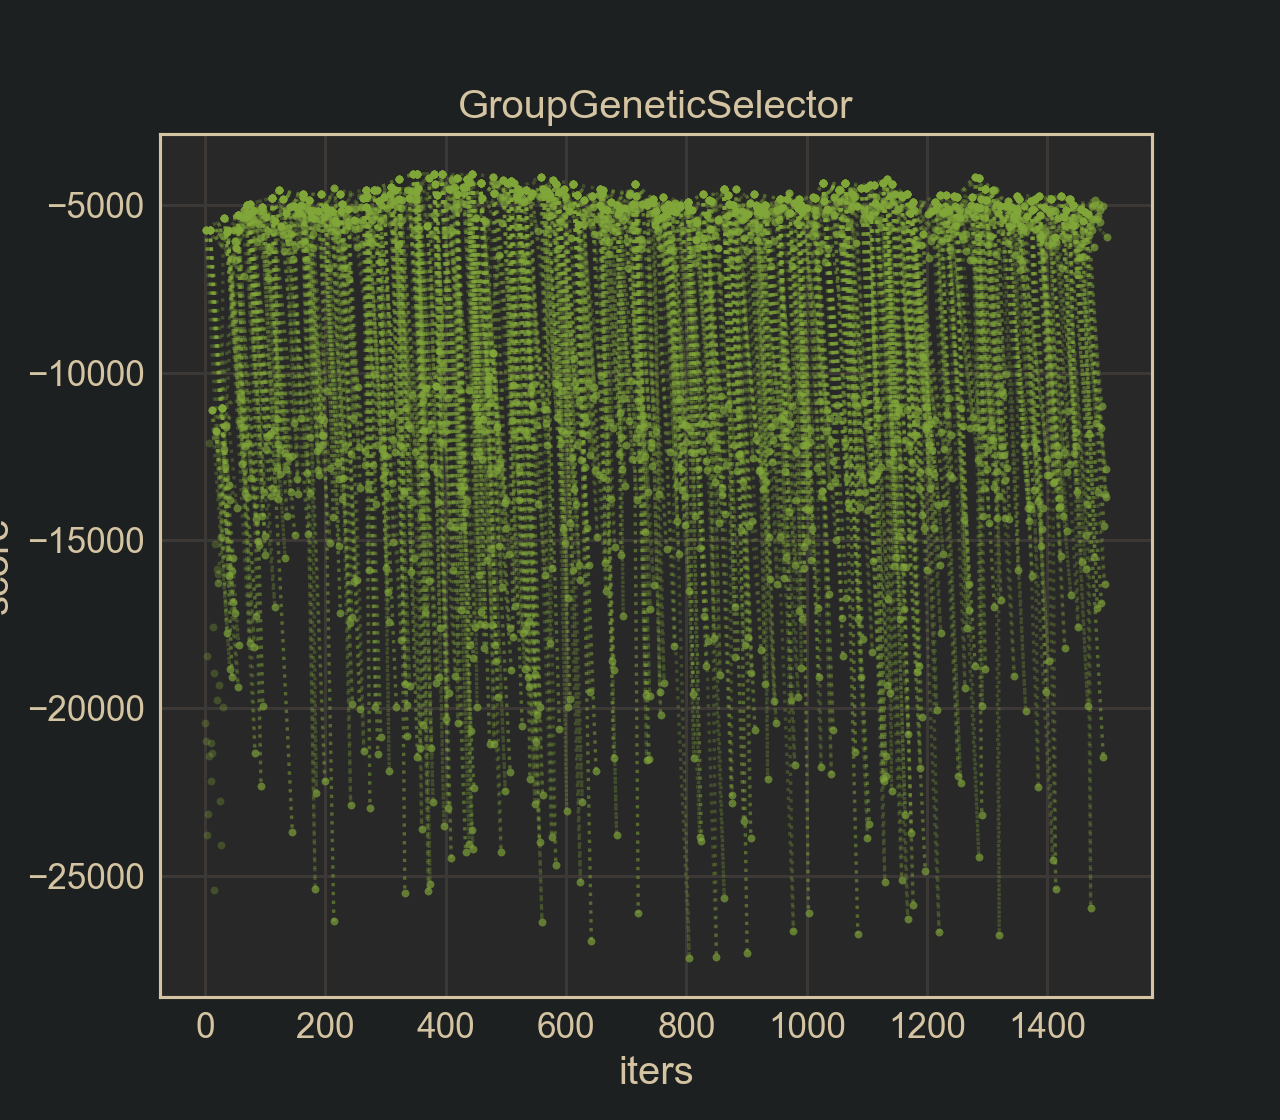

In [15]:
%matplotlib notebook

fig, ax = selector.plot_progress(marker='.', color='g', linestyle=':', alpha=0.3)

In [16]:
subset = selector.get_subset()

_, y_pred = crossval_predict(model, cv, X_train_[subset], y_train, X_new=X_test_[subset],
                             scoring=scoring, verbose=2, n_jobs=-1)

get_score(y_test, y_pred)

[23:53:35]  LinearRegression

[23:53:35]  VAL 1:   -3635.0935
[23:53:35]  VAL 2:   -3462.1338
[23:53:35]  VAL 3:   -5548.4850
[23:53:35]  VAL 4:   -4497.4197
[23:53:35]  VAL 5:   -3180.1247

[23:53:36]  VALID:   -4064.6513 ± 862.4367



-5380.227215585138

In [17]:
subset

FeatureSubset(Index(['x3-x5', 'x6-x8', 'x27-x29', 'x30-x32', 'x36-x38', 'x42-x44'], dtype='object'))